In [10]:
%matplotlib inline

In [13]:
# ESTE TUTORIAL ENSINARÁ A COMO FAZER UM MAPA DE ÁREA DE ESTUDO UTILIZANDO O PYTHON

# IMPORTANDO MÓDULOS
import numpy as np # módulo de funções matemáticas
from mpl_toolkits.basemap import Basemap # módulo de mapas
import matplotlib.pyplot as plt #módulo de criação de imagens

# DEFININDO LIMITES DO MAPA
longitude_min,longitude_max = -53.5,-45.0
latitude_min,latitude_max   = -04.0, 03.0

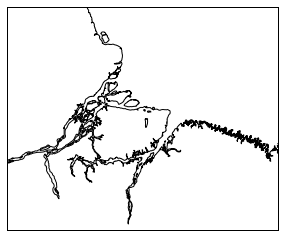

In [32]:
# A função Basemap cria um objeto da classe mapa com funções gráficas de plot
# Vamos dar um help nessa função para entender como ela funciona
# Se você rodar help(Basemap)
# Você obterá um monte de informação sobre essa classe
# Algo com início:

# Basemap.__init__(self, llcrnrlon=None, llcrnrlat=None, urcrnrlon=None,
#     urcrnrlat=None, llcrnrx=None, llcrnry=None, urcrnrx=None, urcrnry=None, 
#     width=None, height=None, projection='cyl', resolution='c', area_thresh=None, 
#     rsphere=6370997.0, ellps=None, lat_ts=None, lat_1=None, lat_2=None, lat_0=None, 
#     lon_0=None, lon_1=None, lon_2=None, o_lon_p=None, o_lat_p=None, k_0=None, no_rot=False, 
#     suppress_ticks=True, satellite_height=35786000, boundinglat=None, fix_aspect=True, 
#     anchor='C', celestial=False, round=False, epsg=None, ax=None)
# Calling a Basemap class instance with the arguments lon, lat will
# convert lon/lat (in degrees) to x/y map projection coordinates
# (in meters). The inverse transformation is done if the optional keyword
# ``inverse`` is set to True.

# llcrnrlon e llcrnrlat são os limites inferiores de longitude e latitude do mapa
# urcrnrlon e urcrnrlat são os limites superiores de longitude e latitude do mapa
# Temos também a projeção do mapa, resolução (que pode ser crude 'c', low 'l',
# intermediate 'i', high 'h' ou full 'f'),
# e outras informações

# Não precisaremos utilizar todas, então vamos criar um mapa com resolução alta (high)
# nos limites que definimos anteriormente em projeção mercator

# Criamos primeiro uma figura
plt.figure()
# Agora o mapa
M = Basemap(llcrnrlon=longitude_min, llcrnrlat=latitude_min, 
            urcrnrlon=longitude_max, urcrnrlat=latitude_max,
            resolution='h',projection='merc')
# Nosso mapa ainda não tem nada desenhado. Para desenhar a linha de costa,
# utilizamos a função embutida nele chamada drawcoastlines
M.drawcoastlines();

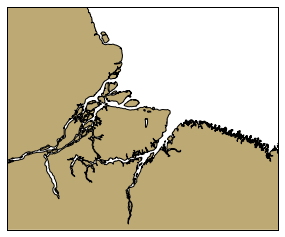

In [33]:
# Nosso mapa não tem cores diferenciadas para continente e oceano
# Para isso utilizaremos a função embutida fillcontinents() e
# configuraremos o seu atributo color com a cor que queremos

# entre no site http://www.colorspire.com/ escolha uma cor de
# preferências e copie o seu código que aparece depois do símbolo '#'
# Eu escolhi a cor: '#BDA973'

M.fillcontinents(color='#BDA973');
M.drawcoastlines(linewidth=1); # a expessura da linha dos continentes
                               # também pode ser configurada

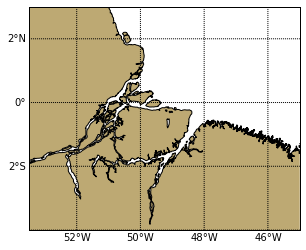

In [41]:
# Agora o nosso mapa precisa de linhas de paralelos
# e meridianos então, além de realizarmos o passo anterior

M.fillcontinents(color='#BDA973');
M.drawcoastlines(linewidth=1); # a expessura da linha dos continentes
                               # também pode ser configurada

# Utilizaremos as funções drawparallels e drawmeridians
# Os labels se referem aonde ficarão escritas as latitudes
# e longitudes. [Esquerda, Direita, Cima, Baixo]

# A função range() cria uma lista de valores do primeiro ao
# segundo argumento, com um passo referente ao terceiro argumento
lbs=[True, False, False, True]
M.drawmeridians(range(-180,180,2),labels=lbs);
M.drawparallels(range(-90,90,2),labels=lbs);

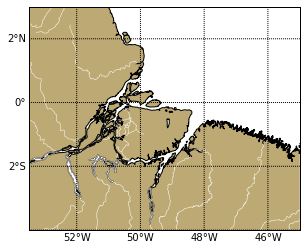

In [37]:
# Além do passo anterior:
M.fillcontinents(color='#BDA973');
M.drawcoastlines(linewidth=1); # a expessura da linha dos continentes
                               # também pode ser configurada

lbs=[True, False, False, True]
M.drawmeridians(range(-180,180,2),labels=lbs);
M.drawparallels(range(-90,90,2),labels=lbs);

#Desenharemos também os rios que tiverem na região.
# Desenharemos em branco
M.drawrivers(color='w');

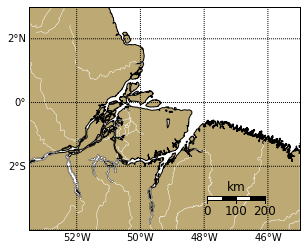

In [45]:
# Além dos passos anteriores:
M.fillcontinents(color='#BDA973');
M.drawcoastlines(linewidth=1); # a expessura da linha dos continentes
                               # também pode ser configurada

lbs=[1, 0, 0, 1];
M.drawmeridians(range(-180,180,2),labels=lbs);
M.drawparallels(range(-90,90,2),labels=lbs);

M.drawrivers(color='w');

# Faremos uma escala
M.drawmapscale(-47,-3,-49,0,200,barstyle='fancy',fontsize=12);
# os dois primeiros argumentos se referem a posição da escala no mapa
# os dois seguintes se referem a latitude e longitude central para cálculo do mapa
# o quarto argumento se refere ao tamanho, em Km da escala
# o quinto argumento se refere ao estilo.
# o sexto argumento se refere ao tamanho da fonte do texto da escala

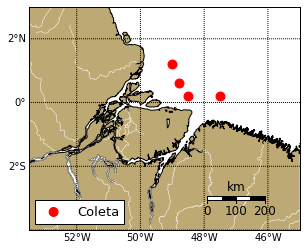

In [52]:
# Podemos além de tudo que já foi feito:
M.fillcontinents(color='#BDA973');
M.drawcoastlines(linewidth=1);

lbs=[1, 0, 0, 1]
M.drawmeridians(range(-180,180,2),labels=lbs);
M.drawparallels(range(-90,90,2),labels=lbs);

M.drawrivers(color='w');

M.drawmapscale(-47,-3,-49,0,200,barstyle='fancy',fontsize=12);


# Plotar pontos de coleta
# Definindo coordenadas dos pontos de coleta
plon,plat = [-47.5,-48.5,-48.8,-49],[0.2,0.21,0.6,1.2]

# Plotando
M.scatter(plon,plat,s=80,color='red',latlon=True,label='Coleta');
# o atributo s fornece o tamanho dos pontos
# o atributo color fornece a cor dos pontos
# o atributo lonlat informa que as coordenadas estão em 
# latitude e longitude
# o atributo label fornece o nome dos pontos para legenda

# Criando legenda
plt.legend(fontsize=13,scatterpoints=1,loc='lower left');
# scatterpoints fornece quantos pontos terão na legenda
# loc dirá onde na figura a legenda ficará

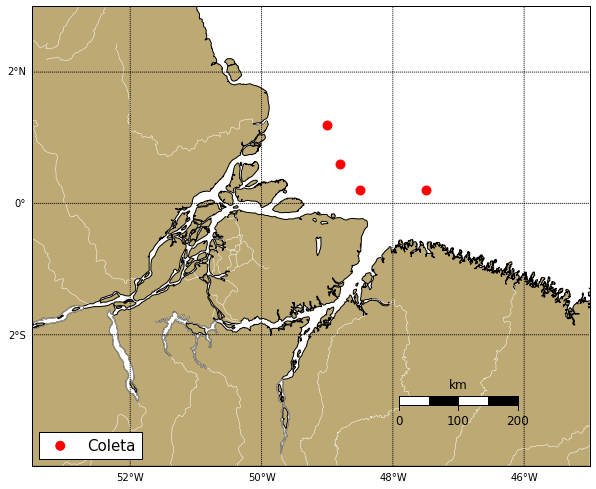

In [54]:
# A Rotina completa do mapa é:

# IMPORTANDO MÓDULOS
import numpy as np # módulo de funções matemáticas
from mpl_toolkits.basemap import Basemap # módulo de mapas
import matplotlib.pyplot as plt #módulo de criação de imagens

# DEFININDO LIMITES DO MAPA
longitude_min,longitude_max = -53.5,-45.0
latitude_min,latitude_max   = -04.0, 03.0

# Cria uma figura
plt.figure(figsize=(10,10)) #aqui definimos um tamanho maior para a figura
# Cria o mapa
M = Basemap(llcrnrlon=longitude_min, llcrnrlat=latitude_min, 
            urcrnrlon=longitude_max, urcrnrlat=latitude_max,
            resolution='h',projection='merc')

# Preenchimento dos continentes
M.fillcontinents(color='#BDA973');
# Linhas de costa
M.drawcoastlines(linewidth=1);

# Meridianos e Paralelos
lbs=[1, 0, 0, 1]
M.drawmeridians(range(-180,180,2),labels=lbs);
M.drawparallels(range(-90,90,2),labels=lbs);

# Rios
M.drawrivers(color='w');

# Escala
M.drawmapscale(-47,-3,-49,0,200,barstyle='fancy',fontsize=12);

# Definindo coordenadas dos pontos de coleta
plon,plat = [-47.5,-48.5,-48.8,-49],[0.2,0.21,0.6,1.2]

# Plotando
M.scatter(plon,plat,s=80,color='red',latlon=True,label='Coleta');

# Criando legenda
plt.legend(fontsize=15,scatterpoints=1,loc='lower left');

In [ ]:
# Pra salvar
plt.savefig('caminho/para/pasta/'+'nomedoarquivo.png',dpi=200)
# dpi define a resolução da imagem (use acima de 150)